In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

In [2]:
seed=123
tf.config.experimental.enable_op_determinism()
tf.random.set_seed(seed)
tf.keras.utils.set_random_seed(seed)
tf.keras.initializers.GlorotNormal(seed)

model_folder='Model/Fe_Fi_NM'
imsize=128
batch_size=16
num_epochs=150


In [3]:
def delete_files_in_directory(directory_path):
   try:
     files = os.listdir(directory_path)
     for file in files:
       file_path = os.path.join(directory_path, file)
       if os.path.isfile(file_path):
         os.remove(file_path)
     print(f"All files in {directory_path} deleted successfully.")
   except OSError:
     print(f"Error occurred while deleting files in {directory_path}.")

# Usage
delete_files_in_directory(model_folder)

All files in Model/Fe_Fi_NM deleted successfully.


In [4]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding="same", input_shape=(imsize, imsize, 1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding="same"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Conv2D(8, (3,3), activation='relu', padding="same"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))

model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.BatchNormalization())

# model.add(tf.keras.layers.Dense(3, activation='sigmoid'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

model.summary()

d:\projects\cnn-mp-dos\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 8)      │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        65,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,475 (314.36 KB)

 Trainable params: 80,299 (313.67 KB)

 Non-trainable params: 176 (704.00 B)

In [5]:
model_filename = model_folder+'/CNN_Multiclass_F_Fi_NM_{epoch}.keras'

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath = model_filename,
    monitor='val_loss',
    verbose=0,    
    save_best_only=False,
    save_weights_only=False,
    mode='min',
    save_freq='epoch',
    initial_value_threshold=None
)

In [6]:
model.compile(optimizer = "Adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [7]:
#Training Data****************************************
ori_fe_fi_training_data_path='Data_Preprocessing/data_split_original/training_data/Fe_Fi_NM'
ori_fe_fi_validation_data_path='Data_Preprocessing/data_split_original/validation_data/Fe_Fi_NM'
ori_fe_fi_testing_data_path='Data_Preprocessing/data_split_original/testing_data/Fe_Fi_NM'
save_train_dir='Data_Preprocessing/on_the_fly/Fe_Fi_NM/train'
save_val_dir='Data_Preprocessing/on_the_fly/Fe_Fi_NM/valid'
save_test_dir='Data_Preprocessing/on_the_fly/Fe_Fi_NM/test'
#*****************************************************

delete_files_in_directory(save_train_dir)
delete_files_in_directory(save_val_dir)
delete_files_in_directory(save_test_dir)

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    ori_fe_fi_training_data_path,
    target_size=(imsize, imsize),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=True,
    # save_to_dir=save_train_dir
)

val_generator = val_datagen.flow_from_directory(
    ori_fe_fi_validation_data_path,
    target_size=(imsize, imsize),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=False,
    # save_to_dir=save_val_dir
)

test_generator = test_datagen.flow_from_directory(
    ori_fe_fi_testing_data_path,
    target_size=(imsize, imsize),
    batch_size=batch_size,
    # save_to_dir=save_test_dir,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=False
)

All files in Data_Preprocessing/on_the_fly/Fe_Fi_NM/train deleted successfully.
All files in Data_Preprocessing/on_the_fly/Fe_Fi_NM/valid deleted successfully.
All files in Data_Preprocessing/on_the_fly/Fe_Fi_NM/test deleted successfully.
Found 152 images belonging to 3 classes.
Found 71 images belonging to 3 classes.
Found 71 images belonging to 3 classes.


In [8]:
history = model.fit(train_generator, 
                    epochs=num_epochs, 
                    validation_data=val_generator, 
                    batch_size=batch_size, 
                    callbacks=[model_checkpoint])

d:\projects\cnn-mp-dos\venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 230ms/step - accuracy: 0.4903 - loss: 1.0656 - val_accuracy: 0.3380 - val_loss: 1.1099
Epoch 2/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - accuracy: 0.7491 - loss: 0.6087 - val_accuracy: 0.3380 - val_loss: 1.1242
Epoch 3/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - accuracy: 0.7483 - loss: 0.5573 - val_accuracy: 0.3380 - val_loss: 1.1887
Epoch 4/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - accuracy: 0.8204 - loss: 0.4195 - val_accuracy: 0.3380 - val_loss: 1.2743
Epoch 5/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.7771 - loss: 0.4506 - val_accuracy: 0.3380 - val_loss: 1.3629
Epoch 6/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - accuracy: 0.8240 - loss: 0.3990 - val_accuracy: 0.3380 - val_loss: 1.4394
Epoch 7/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.8626 - loss: 0.2961 - val_accuracy: 0.3380 - val_loss: 1.5138
Epoch 8/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.8662 - loss: 0.3551 - val_accu

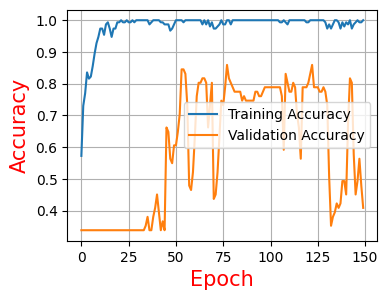

In [9]:
plt.subplots(figsize=(4,3));
plt.plot(history.history['accuracy']);
plt.plot(history.history['val_accuracy']);
plt.ylabel('Accuracy', color='red', fontsize = 15);
plt.xlabel('Epoch', color='red', fontsize = 15);
plt.legend(['Training Accuracy', 'Validation Accuracy']);
plt.grid()

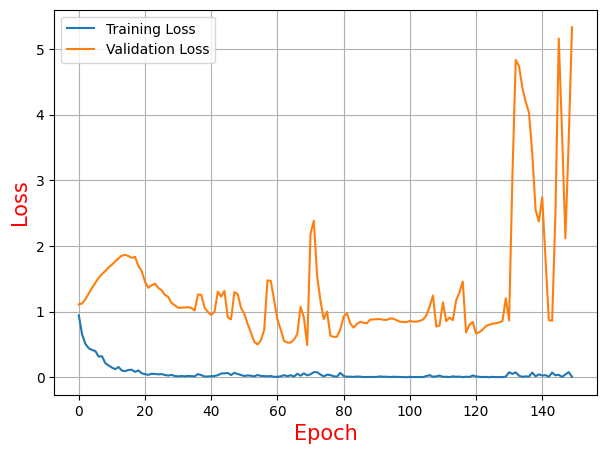

In [10]:
plt.subplots(figsize=(7, 5));
plt.plot(history.history['loss']);
plt.plot(history.history['val_loss']);
plt.ylabel('Loss', color='red', fontsize = 15);
plt.xlabel('Epoch', color='red', fontsize = 15);
plt.legend(['Training Loss', 'Validation Loss']);
plt.grid()

**EVALUATING ALL MODELS**: *Selecting BEST MODEL (BEST ACCURACY)*

In [11]:
test_generator.class_indices

{'class_fe': 0, 'class_fi': 1, 'class_nm': 2}

In [12]:
import re
model_folder='Model/Fe_Fi_NM'
LABELS=['Ferromagnetic','Ferrimagnetic', 'Non_Magnetic']
dir_list = os.listdir(model_folder)
best_epoch=-1
best_model=''
acc_max=-1
actual_class = test_generator.labels #np.argmax(testY,axis=1)
for filename in dir_list:
    model_check = tf.keras.models.load_model(model_folder+'/'+filename)
    predicted_class =np.argmax(((model_check.predict(test_generator,verbose=0) > .5).astype(int)),axis=1)
    report=classification_report(actual_class, predicted_class, target_names=LABELS,output_dict=True,zero_division=np.nan)
    if report['accuracy']>acc_max:
        best_model=model_folder+'/'+filename
        r=re.findall('[0-9]+', filename)
        best_epoch=int(r[0])
        acc_max=report['accuracy']

model_best = tf.keras.models.load_model(best_model)
predicted_class =np.argmax(((model_best.predict(test_generator) > .5).astype(int)),axis=1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


In [13]:
report=classification_report(actual_class, predicted_class, target_names=LABELS)
print('Best model: ', best_model)
print('=======================================================')
print(report)

Best model:  Model/Fe_Fi_NM/CNN_Multiclass_F_Fi_NM_109.keras
               precision    recall  f1-score   support

Ferromagnetic       0.62      0.83      0.71        24
Ferrimagnetic       0.80      0.57      0.67        21
 Non_Magnetic       0.96      0.88      0.92        26

     accuracy                           0.77        71
    macro avg       0.79      0.76      0.77        71
 weighted avg       0.80      0.77      0.78        71



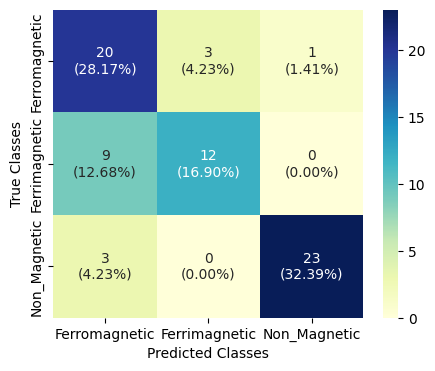

In [14]:
cf_mtx = confusion_matrix(actual_class, predicted_class)

group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten()/np.sum(cf_mtx)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]
box_labels = np.asarray(box_labels).reshape(3,3)

plt.figure(figsize = (5, 4))
sns.heatmap(cf_mtx, xticklabels=LABELS, yticklabels=LABELS,
           cmap="YlGnBu", fmt="", annot=box_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()

In [15]:
import pandas as pd
train_loss,train_acc=model_best.evaluate(train_generator,verbose=0)
val_loss,val_acc=model_best.evaluate(val_generator,verbose=0)
test_loss,test_acc=model_best.evaluate(test_generator,verbose=0)
dict_df={'Accuracy':[train_acc,val_acc,test_acc],'Loss':[train_loss,val_loss,test_loss]}

print(f'Best Model: {best_model}')
df=pd.DataFrame(dict_df,index=['Training','Validation','Testing'])
df

Best Model: Model/Fe_Fi_NM/CNN_Multiclass_F_Fi_NM_109.keras


,Accuracy,Loss
Training,0.980263,0.035158
Validation,0.830986,0.772126
Testing,0.774648,1.278419
